In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

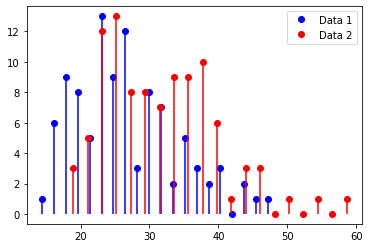

In [4]:
N = 100

r = np.random.randn(N)
r[r > 0] = np.log(1 + r[r > 0])
data_1 = 26 - r * 10

y_1, x_1 = np.histogram(data_1, 20)
x_1 = (x_1[:-1]+x_1[1:])/2

r = np.random.randn(N)
r[r>0] = np.log(1 + r[r > 0])
data_2 = 30 - r * 10

y_2, x_2 = np.histogram(data_2, 20)
x_2 = (x_2[:-1] + x_2[1:]) / 2


plt.stem(x_1, y_1, 'b', markerfmt='bo', basefmt=' ', label='Data 1')
plt.stem(x_2, y_2, 'r', markerfmt='ro', basefmt=' ', label='Data 2')
plt.legend()
plt.show()

In [5]:
all_data = np.hstack((data_1, data_2))

conditions = np.hstack((np.ones(N), 2 * np.ones(N)))

In [6]:
# null hypothesis

fake_conditions = np.random.permutation(N*2)

fake_conditions[fake_conditions < N] = 1
fake_conditions[fake_conditions > 1] = 2


print([np.mean(all_data[conditions == 1]), np.mean(all_data[conditions == 2])])
print([np.mean(all_data[fake_conditions == 1]), np.mean(all_data[fake_conditions ==2 ])])


[26.484519442169475, 31.565248114184836]
[29.58693945598647, 28.462828100367844]


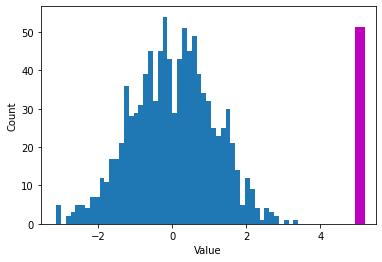

In [9]:
# distribution of null hypothesis

permutations_n = 1000
permutation_diffs = np.zeros(permutations_n)

for permi in range(permutations_n):
    f_conds = np.random.permutation(N * 2)
    f_conds[f_conds<N] = 1
    f_conds[f_conds>1] = 2
    permutation_diffs[permi] = np.mean(all_data[f_conds == 2]) - np.mean(all_data[f_conds == 1])


plt.hist(permutation_diffs, 50)

observed_value = np.mean(all_data[conditions == 2]) - np.mean(all_data[conditions == 1])
plt.plot([observed_value, observed_value], [0, 50], 'm', linewidth = 10)
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [12]:
## two methods of evaluating significance

# Z-value
z_value = (observed_value - np.mean(permutation_diffs)) / np.std(permutation_diffs, ddof = 1)
p_value = 1 - stats.norm.cdf(abs(z_value))

# p-value count
p_count = sum(permutation_diffs > observed_value) / permutations_n

print(p_value, p_count)

2.3997466267466905e-06 0.0
